In [11]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import animation as animation

In [12]:
mu_truth = 0.4
a = 1.0
b = 1.0
mu_star = a / (a + b)
mu_line = np.arange(0.0, 1.001, 0.001)
N = 100

In [13]:
x_n = np.empty(N)
trace_a = [a]
trace_b = [b]
trace_mu = [mu_star]
trace_posterior = [stats.beta.pdf(x=mu_line, a=a, b=b)]
trace_predict = [[1 - mu_star, mu_star]]

for i in range(N):
    x_n[i] = np.random.binomial(n=1, p=mu_truth, size=1)
    
    a += x_n[i]
    b += 1 - x_n[i]
    trace_posterior.append(stats.beta.pdf(x=mu_line, a=a, b=b))
    
    mu_star = a / (a + b)
    trace_predict.append([1 - mu_star, mu_star])
    
    trace_a.append(a)
    trace_b.append(b)
    trace_mu.append(mu_star)

In [21]:
def update_posterior(n):
    plt.cla()
    
    plt.plot(mu_line, trace_posterior[n])
    plt.vlines(
        x=mu_truth, 
        ymin=0, 
        ymax=np.nanmax(trace_posterior), 
        linestyles="--", 
        color="red",
    )
    plt.xlabel("mu")
    plt.ylabel("Density")
    plt.suptitle("Beta Distribution")
    plt.title(
        f"N={N}, a_hat={trace_a[n]}, b_hat={trace_b[n]}", 
        loc="left",
    )    

MovieWriter ffmpeg unavailable; using Pillow instead.


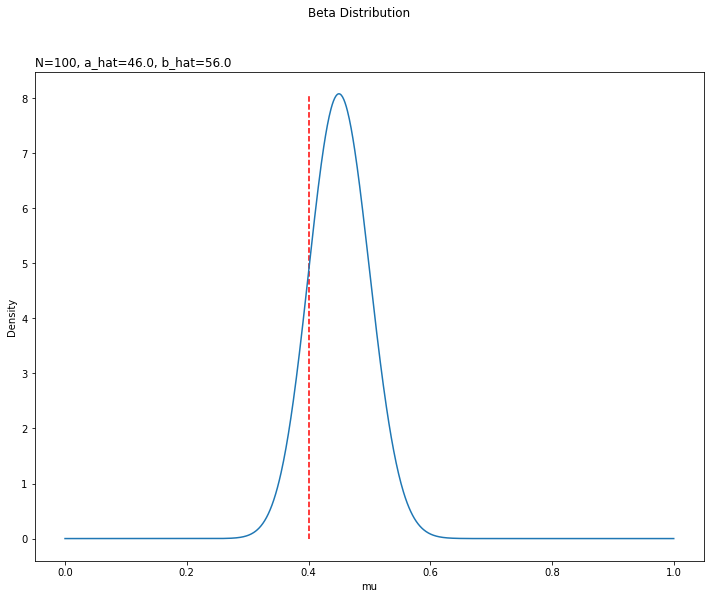

In [27]:
fig = plt.figure(figsize=(12, 9))

posterior_anime = animation.FuncAnimation(
    fig,
    update_posterior, 
    frames=N + 1, 
    interval=100,
)
posterior_anime.save("ch3_2_1_Posterior.gif")

In [29]:
x_point = np.array([0, 1])

In [30]:
def update_predict(n):
    plt.cla()
    
    plt.bar(
        x=x_point, 
        height=[1 - mu_truth, mu_truth], 
        color="white", 
        edgecolor="red", 
        linestyle="dashed", 
        label="true",
    )
    plt.bar(
        x=x_point, 
        height=trace_predict[n], 
        label="predict",
    )
    plt.xlabel("x")
    plt.ylabel("prob")
    plt.xticks(ticks=x_point, labels=x_point)
    plt.suptitle("Bernoulli Distribution")
    plt.title(
        f"N={n}, mu_hat={np.round(trace_mu[n], 2)}", 
        loc="left",
    )
    plt.ylim(0.0, 1.0)
    plt.legend()

MovieWriter ffmpeg unavailable; using Pillow instead.


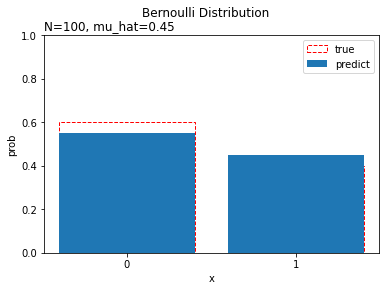

In [31]:
predict_anime = animation.FuncAnimation(
    fig, 
    update_predict, 
    frames=N + 1, 
    interval=100,
)
predict_anime.save("ch3_2_1_Predict.gif")

In [32]:
print('end')

end
